In [45]:
import pandas as pd

df2011 = pd.read_csv('../data/MARINE_time_2011.csv', encoding='euc-kr')
df2012 = pd.read_csv('../data/MARINE_time_2012.csv', encoding='euc-kr')
df2013 = pd.read_csv('../data/MARINE_time_2013.csv', encoding='euc-kr')
df2014 = pd.read_csv('../data/MARINE_time_2014.csv', encoding='euc-kr')
df2015 = pd.read_csv('../data/MARINE_time_2015.csv', encoding='euc-kr')
df2016 = pd.read_csv('../data/MARINE_time_2016.csv', encoding='euc-kr')
df2017 = pd.read_csv('../data/MARINE_time_2017.csv', encoding='euc-kr')
df2018 = pd.read_csv('../data/MARINE_time_2018.csv', encoding='euc-kr')
df2019 = pd.read_csv('../data/MARINE_time_2019.csv', encoding='euc-kr')
df2020 = pd.read_csv('../data/MARINE_time_2020.csv', encoding='euc-kr')
df2021 = pd.read_csv('../data/MARINE_time_2021.csv', encoding='euc-kr')
df2022 = pd.read_csv('../data/MARINE_time_2022.csv', encoding='euc-kr')
df2023 = pd.read_csv('../data/MARINE_time_2023.csv', encoding='euc-kr')

df_combined = pd.concat([df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018,
                         df2019, df2020, df2021, df2022, df2023], ignore_index=True)

df_combined.isnull().sum()


지점                   0
일시                   0
풍속(m/s)          27710
풍향(deg)          27708
GUST풍속(m/s)      27816
현지기압(hPa)         3926
습도(%)             1963
기온(°C)            3015
수온(°C)            1773
최대파고(m)            678
유의파고(m)           1552
평균파고(m)           1794
파주기(sec)          1459
파향(deg)           1569
풍속1(m/s)         78786
풍향1(deg)         78786
GUST풍속 1(m/s)    78793
dtype: int64

결측치가 너무 많기에 제거법 사용은 비합리적이라고 판단

대체값을 채우는 방법!
1. 평균값 또는 중앙값 대체
2. 최빈값 대체
3. 선형 보간법
4. K-최근접 이웃(KNN)
5. 회귀 대체
6. 핫덱 대체

이 중 핫덱 대체법이 가장 적합하다고 판단 후 이행

In [46]:
# 비슷한 사례를 찾아서 결측치 채우기
from sklearn.impute import KNNImputer

# '일시' 열을 datetime 형식으로 변환하고 필요한 경우 삭제
df_combined['일시'] = pd.to_datetime(df_combined['일시'])
df = df_combined.drop(columns=['일시'])

# 수치형 데이터 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# KNNImputer를 사용하여 수치형 데이터 결측치 대체
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

df.head(), df.tail()


(        지점  풍속(m/s)  풍향(deg)  GUST풍속(m/s)  현지기압(hPa)  습도(%)  기온(°C)  수온(°C)  \
 0  21229.0      2.1    304.0          4.2     1031.0   45.0     6.2    11.9   
 1  21229.0      4.5    293.0          6.9     1030.6   51.0     6.2    11.7   
 2  21229.0      4.6    277.0          7.2     1030.4   42.0     6.5    12.4   
 3  21229.0      3.2    285.0          6.0     1030.4   40.0     6.5    13.2   
 4  21229.0      2.7    276.0          4.6     1030.5   41.0     6.7    13.3   
 
    최대파고(m)  유의파고(m)  평균파고(m)  파주기(sec)  파향(deg)  풍속1(m/s)  풍향1(deg)  \
 0      3.7      2.2      1.1       6.4    103.0      4.04     273.0   
 1      3.6      2.2      1.1       4.3     82.0      5.58     225.6   
 2      3.4      2.1      1.0       4.9    206.0      4.16     280.6   
 3      3.3      2.1      1.0       4.6      8.0      5.62     308.8   
 4      2.6      1.9      1.0       9.1     37.0      3.94     282.4   
 
    GUST풍속 1(m/s)  
 0           6.62  
 1           8.38  
 2           6.80  
 3  

In [47]:
df.isnull().sum()

지점               0
풍속(m/s)          0
풍향(deg)          0
GUST풍속(m/s)      0
현지기압(hPa)        0
습도(%)            0
기온(°C)           0
수온(°C)           0
최대파고(m)          0
유의파고(m)          0
평균파고(m)          0
파주기(sec)         0
파향(deg)          0
풍속1(m/s)         0
풍향1(deg)         0
GUST풍속 1(m/s)    0
dtype: int64

In [48]:
df.to_csv('MARINE_time_combined.csv', index=False, encoding='utf-8')

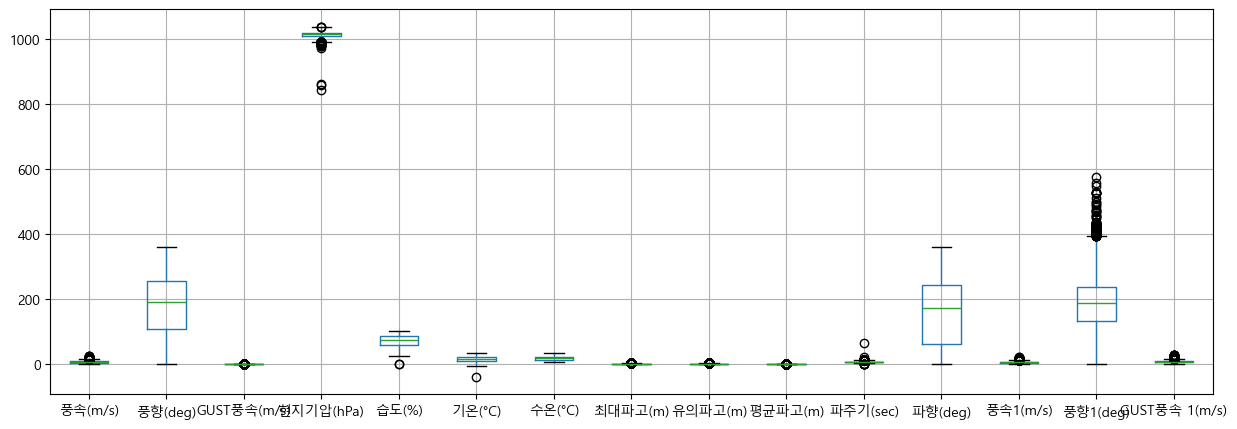

In [37]:
# 이상치 확인
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

df.drop('지점', axis=1).boxplot(figsize=(15,5))
plt.show()

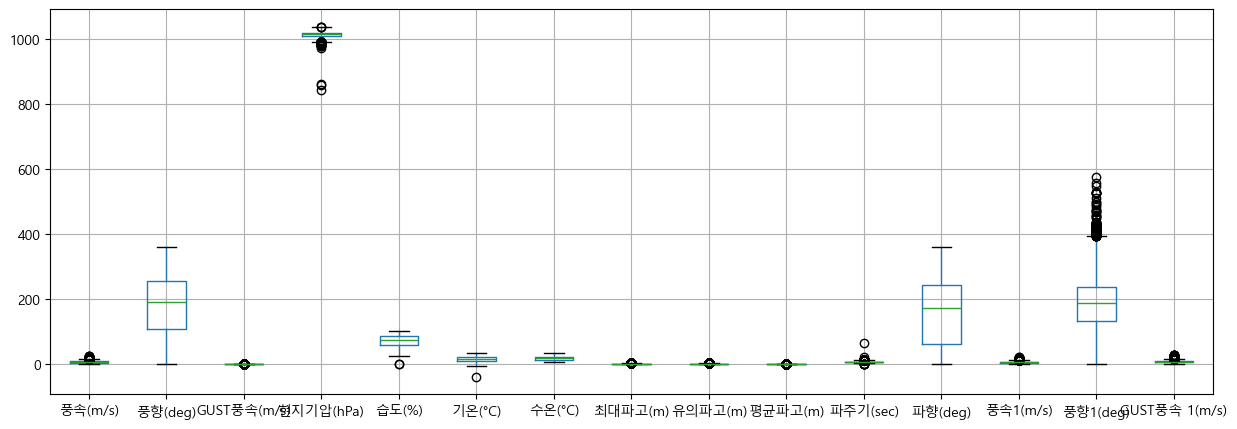

In [ ]:
# 이상치 제거
df = df[df['풍향1(deg)'] <= 800]

# 이상치 재재확인
import matplotlib.pyplot as plt

df.drop('지점', axis=1).boxplot(figsize=(15,5))
plt.show()

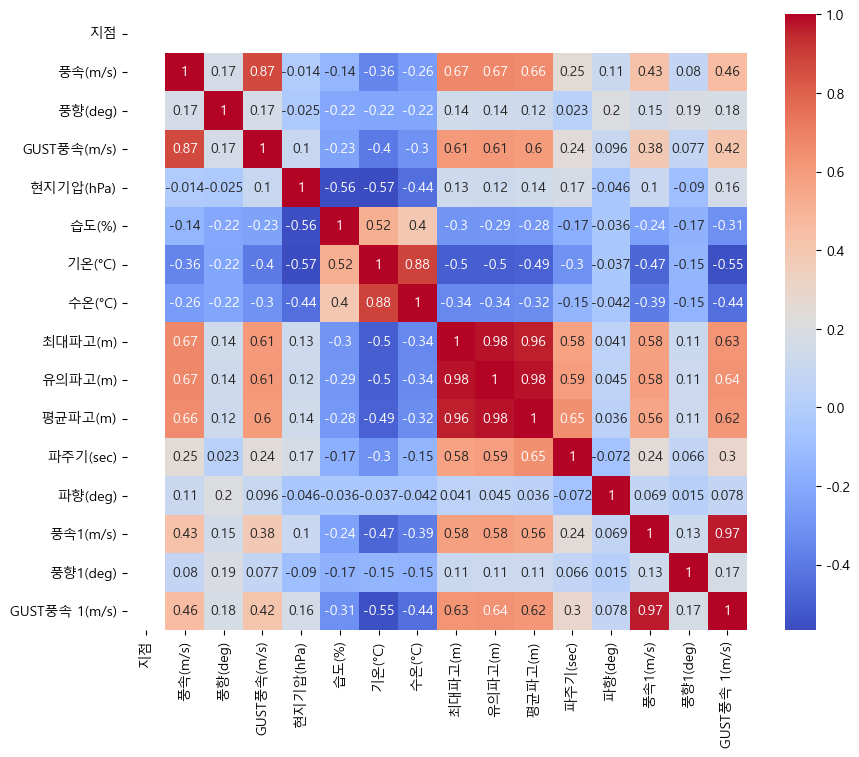

In [33]:
# 상관관계
import seaborn as sns

corr_mat = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

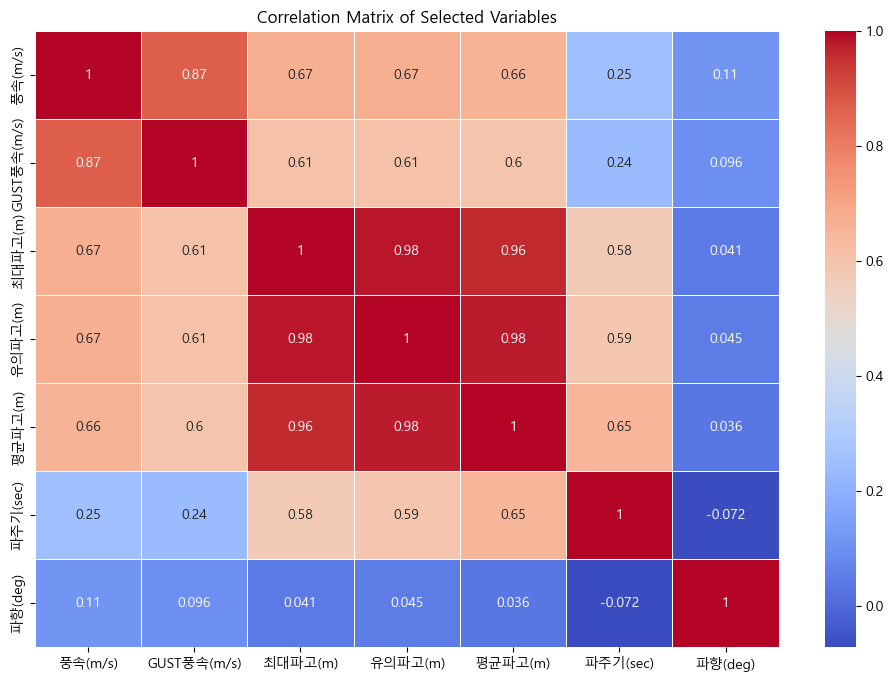

In [34]:
selected_columns = ['풍속(m/s)', 'GUST풍속(m/s)', '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']

# 선택된 변수 간의 상관관계 행렬 계산
correlation_matrix = df[selected_columns].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [36]:
# 왜도 확인
import numpy as np

df.loc[:, 'GUST풍속(m/s)'] = np.log1p(df['GUST풍속(m/s)'])
# df.loc[:, '최대파고(m)'] = np.log1p(df['최대파고(m)'])
# df.loc[:, '유의파고(m)'] = np.log1p(df['유의파고(m)'])
# df.loc[:, '평균파고(m)'] = np.log1p(df['평균파고(m)'])
df.skew()

지점               0.000000
풍속(m/s)          0.625133
풍향(deg)         -0.100148
GUST풍속(m/s)     -1.955178
현지기압(hPa)       -0.390297
습도(%)           -0.220784
기온(°C)          -0.119567
수온(°C)           0.231371
최대파고(m)          0.375009
유의파고(m)          0.518718
평균파고(m)          0.270207
파주기(sec)         0.656281
파향(deg)          0.170057
풍속1(m/s)         0.711715
풍향1(deg)        -0.029354
GUST풍속 1(m/s)    0.767814
dtype: float64